# importing libraries and data set

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import mlxtend

In [3]:
DF_user = pd.read_csv('user_data.csv')
DF_submission = pd.read_csv('train_submissions.csv')
DF_problem = pd.read_csv('problem_data.csv')

# Visualizing the data sets

In [4]:
DF_user

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498
...,...,...,...,...,...,...,...,...,...,...,...
3566,user_2685,161,120,0,Bangladesh,42,1505409069,306.193,246.560,beginner,1455055521
3567,user_1548,41,30,0,NaN,0,1504026868,331.135,218.463,beginner,1465142933
3568,user_1929,58,51,0,NaN,0,1505552744,330.275,262.901,beginner,1480086231
3569,user_2772,148,137,0,NaN,2,1496606504,409.977,345.757,intermediate,1480262887


In [5]:
DF_submission

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1
...,...,...,...
155290,user_2959,prob_2052,1
155291,user_2530,prob_6167,6
155292,user_445,prob_3110,1
155293,user_2337,prob_2685,2


In [6]:
DF_problem

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"
...,...,...,...,...
6539,prob_3989,K,NaN,NaN
6540,prob_2710,A,500.0,"dfs and similar,dsu"
6541,prob_3269,C,1500.0,"brute force,number theory"
6542,prob_5071,A,500.0,implementation


# checking null values

In [7]:
DF_user.isnull().sum()

user_id                         0
submission_count                0
problem_solved                  0
contribution                    0
country                      1153
follower_count                  0
last_online_time_seconds        0
max_rating                      0
rating                          0
rank                            0
registration_time_seconds       0
dtype: int64

In [8]:
DF_submission.isnull().sum()

user_id           0
problem_id        0
attempts_range    0
dtype: int64

In [9]:
DF_problem.isnull().sum()

problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64

# Merge two data sets

In [10]:
New_df = pd.merge(pd.merge(DF_submission,DF_problem,on='problem_id'),DF_user,on='user_id')

In [11]:
New_df.duplicated().sum()

0

In [12]:
New_df.shape

(155295, 16)

In [13]:
New_df.head(10)

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_232,prob_6507,1,B,1000.0,strings,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
1,user_232,prob_5071,4,A,500.0,implementation,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
2,user_232,prob_703,2,A,500.0,"brute force,implementation",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
3,user_232,prob_3935,1,C,1000.0,"greedy,sortings",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
4,user_232,prob_164,2,A,500.0,"brute force,constructive algorithms,math",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
5,user_232,prob_1550,2,A,1000.0,"brute force,dfs and similar",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
6,user_232,prob_1304,1,A,500.0,implementation,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
7,user_232,prob_5776,2,B,500.0,"implementation,sortings",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
8,user_232,prob_3204,2,A,500.0,"greedy,math",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
9,user_232,prob_5801,1,B,1000.0,"dp,greedy",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935


In [14]:
New_df.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

# data visualization

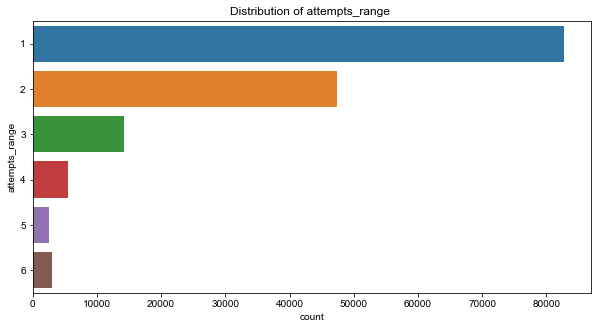

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(y='attempts_range', data=New_df).set_title('Distribution of attempts_range ')
sns.set(font_scale=1.5)

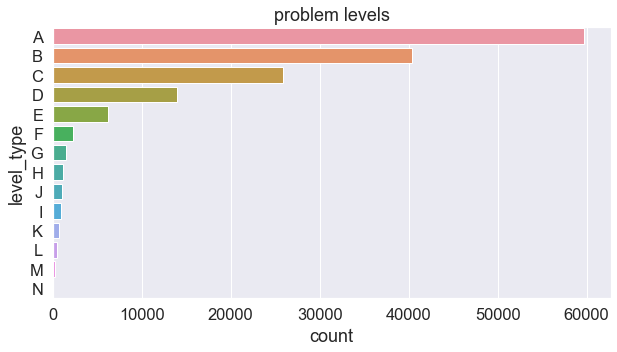

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(y='level_type', data=New_df,  order=New_df.level_type.value_counts().index).set_title('problem levels')
sns.set(font_scale=1.5)

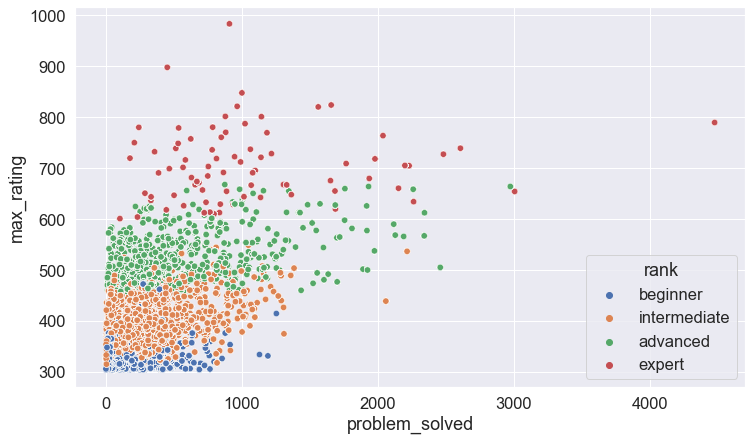

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='problem_solved', y='max_rating', hue='rank', data=New_df, s=40)
plt.show()

In [18]:
New_df.describe()

,attempts_range,points,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,registration_time_seconds
count,155295.000000,126220.000000,155295.000000,155295.000000,155295.000000,155295.000000,1.552950e+05,155295.000000,155295.000000,1.552950e+05
mean,1.755028,993.302369,372.235680,336.078695,5.493718,61.064406,1.503666e+09,407.525560,368.623667,1.427513e+09
std,1.078450,568.115307,398.204943,377.378519,19.076626,258.997551,3.867762e+06,99.670629,112.046565,5.033908e+07
min,1.000000,-1.000000,1.000000,1.000000,-64.000000,0.000000,1.484239e+09,303.899000,0.000000,1.264761e+09
25%,1.000000,500.000000,118.000000,99.000000,0.000000,7.000000,1.504118e+09,323.394000,288.131000,1.408458e+09
50%,1.000000,1000.000000,237.000000,209.000000,0.000000,20.000000,1.505289e+09,383.028000,356.078000,1.442762e+09
75%,2.000000,1500.000000,480.000000,428.000000,1.000000,52.000000,1.505560e+09,468.463000,445.814000,1.464692e+09
max,6.000000,5000.000000,4570.000000,4476.000000,171.000000,10575.000000,1.505595e+09,983.085000,911.124000,1.484236e+09


In [19]:
top10countries = New_df.country.value_counts().head(10)
top10countries

India         30155
Bangladesh    15869
Russia        13088
China          7766
Egypt          5193
Kazakhstan     3553
Vietnam        3079
Brazil         3048
Iran           3036
Ukraine        2813
Name: country, dtype: int64

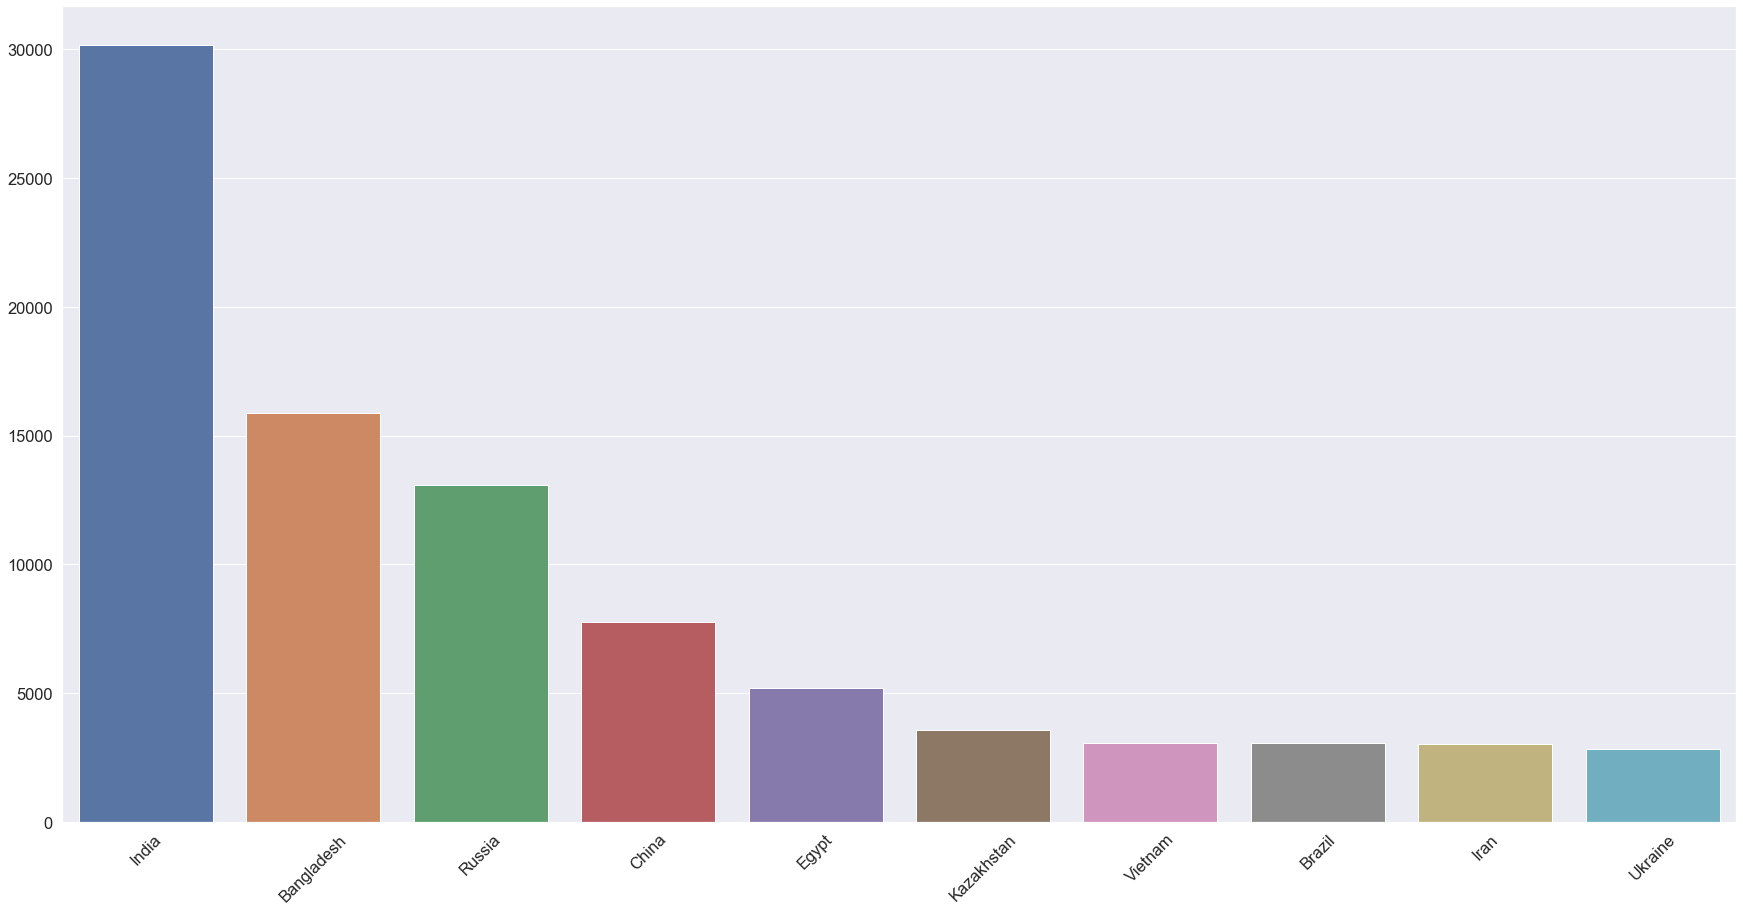

In [20]:
plt.figure(figsize=(30,15))
sns.barplot(x=top10countries.index, y=top10countries.values)
plt.xticks(rotation=45)
sns.set(font_scale=1.5)
plt.show()

<AxesSubplot:>

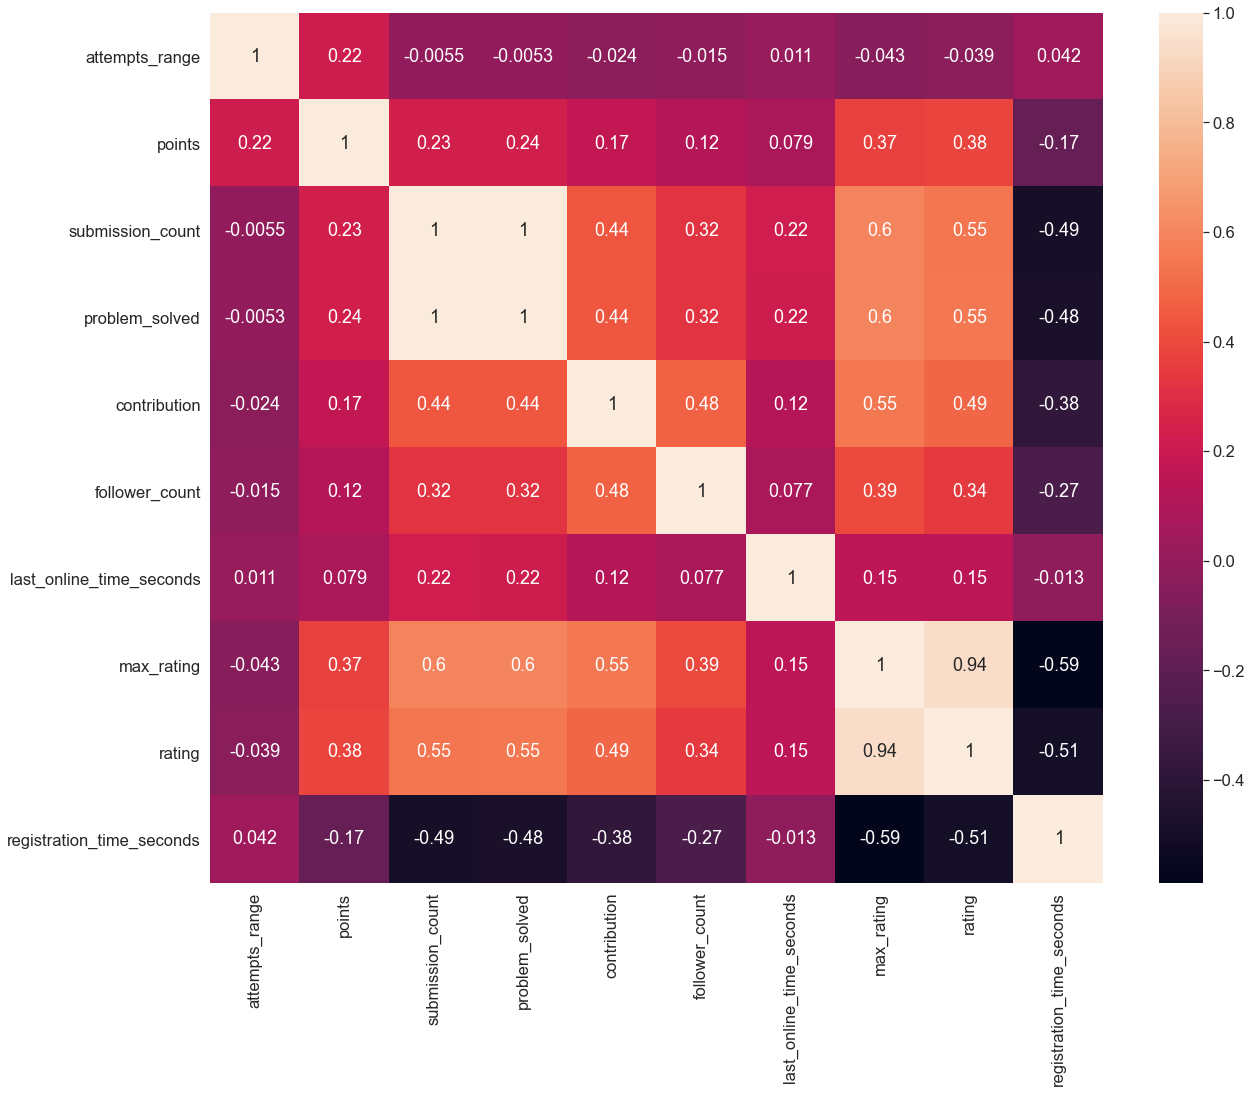

In [21]:
plt.figure(figsize = (20,16))
cmap = New_df.corr()
sns.heatmap(cmap,annot = True)

In [22]:
New_df = New_df.drop(['max_rating','submission_count'], axis = 1)

# fill the null values

In [23]:
New_df['country'] = New_df['country'].fillna(New_df['country'].mode()[0])
New_df['points'] = New_df['points'].fillna(New_df['points'].mean())
New_df['level_type'] = New_df['level_type'].fillna(New_df['level_type'].mode()[0])

In [24]:
New_df.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
level_type                       0
points                           0
tags                         15427
problem_solved                   0
contribution                     0
country                          0
follower_count                   0
last_online_time_seconds         0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

In [25]:
for column_name in New_df.columns:
    column = New_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  user_id  is :  0
Count of zeros in column  problem_id  is :  0
Count of zeros in column  attempts_range  is :  0
Count of zeros in column  level_type  is :  0
Count of zeros in column  points  is :  0
Count of zeros in column  tags  is :  0
Count of zeros in column  problem_solved  is :  0
Count of zeros in column  contribution  is :  101392
Count of zeros in column  country  is :  0
Count of zeros in column  follower_count  is :  6347
Count of zeros in column  last_online_time_seconds  is :  0
Count of zeros in column  rating  is :  61
Count of zeros in column  rank  is :  0
Count of zeros in column  registration_time_seconds  is :  0


In [26]:
New_df = New_df.drop('contribution', axis = 1)

# Encoding

In [27]:
New_df= pd.concat([New_df.drop('tags', axis=1), New_df.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)

In [28]:
New_df

,user_id,problem_id,attempts_range,level_type,points,problem_solved,country,follower_count,last_online_time_seconds,rating,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,user_232,prob_6507,1,B,1000.000000,47,Bangladesh,1,1503633778,206.709,...,0,0,0,0,0,0,1,0,0,0
1,user_232,prob_5071,4,A,500.000000,47,Bangladesh,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
2,user_232,prob_703,2,A,500.000000,47,Bangladesh,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
3,user_232,prob_3935,1,C,1000.000000,47,Bangladesh,1,1503633778,206.709,...,0,0,0,0,1,0,0,0,0,0
4,user_232,prob_164,2,A,500.000000,47,Bangladesh,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,user_1888,prob_1641,3,B,1000.000000,1,India,0,1502805389,215.883,...,0,0,0,0,1,0,0,0,0,0
155291,user_2980,prob_3139,1,I,993.302369,5,India,0,1484250334,314.794,...,0,0,0,0,0,0,0,0,0,0
155292,user_2980,prob_5190,1,E,2500.000000,5,India,0,1484250334,314.794,...,0,0,0,0,0,0,0,0,0,0
155293,user_2980,prob_895,1,C,993.302369,5,India,0,1484250334,314.794,...,0,0,0,0,0,0,0,0,0,0


In [29]:
New_df.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
level_type                       0
points                           0
problem_solved                   0
country                          0
follower_count                   0
last_online_time_seconds         0
rating                           0
rank                             0
registration_time_seconds        0
tag_*special                     0
tag_2-sat                        0
tag_binary search                0
tag_bitmasks                     0
tag_brute force                  0
tag_chinese remainder theorem    0
tag_combinatorics                0
tag_constructive algorithms      0
tag_data structures              0
tag_dfs and similar              0
tag_divide and conquer           0
tag_dp                           0
tag_dsu                          0
tag_expression parsing           0
tag_fft                          0
tag_flows                        0
tag_games           

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label = LabelEncoder()
New_df["level_type"]=label.fit_transform(New_df["level_type"])
New_df["country"]=label.fit_transform(New_df["country"])
New_df["rank"]=label.fit_transform(New_df["rank"])

In [32]:
New_df

,user_id,problem_id,attempts_range,level_type,points,problem_solved,country,follower_count,last_online_time_seconds,rating,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,user_232,prob_6507,1,1,1000.000000,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,1,0,0,0
1,user_232,prob_5071,4,0,500.000000,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
2,user_232,prob_703,2,0,500.000000,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
3,user_232,prob_3935,1,2,1000.000000,47,5,1,1503633778,206.709,...,0,0,0,0,1,0,0,0,0,0
4,user_232,prob_164,2,0,500.000000,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,user_1888,prob_1641,3,1,1000.000000,1,31,0,1502805389,215.883,...,0,0,0,0,1,0,0,0,0,0
155291,user_2980,prob_3139,1,8,993.302369,5,31,0,1484250334,314.794,...,0,0,0,0,0,0,0,0,0,0
155292,user_2980,prob_5190,1,4,2500.000000,5,31,0,1484250334,314.794,...,0,0,0,0,0,0,0,0,0,0
155293,user_2980,prob_895,1,2,993.302369,5,31,0,1484250334,314.794,...,0,0,0,0,0,0,0,0,0,0


In [33]:
New_df.user_id=New_df.user_id.str[5:].astype(int)
New_df.problem_id=New_df.problem_id.str[5:].astype(int)

In [34]:
New_df.points=New_df.points.astype(int)

In [35]:
New_df.head(10)

,user_id,problem_id,attempts_range,level_type,points,problem_solved,country,follower_count,last_online_time_seconds,rating,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,232,6507,1,1,1000,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,1,0,0,0
1,232,5071,4,0,500,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
2,232,703,2,0,500,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
3,232,3935,1,2,1000,47,5,1,1503633778,206.709,...,0,0,0,0,1,0,0,0,0,0
4,232,164,2,0,500,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
5,232,1550,2,0,1000,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
6,232,1304,1,0,500,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
7,232,5776,2,1,500,47,5,1,1503633778,206.709,...,0,0,0,0,1,0,0,0,0,0
8,232,3204,2,0,500,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0
9,232,5801,1,1,1000,47,5,1,1503633778,206.709,...,0,0,0,0,0,0,0,0,0,0


# Normalize the data

In [36]:
from sklearn import preprocessing

In [37]:
select_coloumns = ["points","problem_solved","follower_count","last_online_time_seconds","registration_time_seconds"]
d = preprocessing.normalize(New_df[select_coloumns],axis = 0)
New_df[select_coloumns] = d
New_df

,user_id,problem_id,attempts_range,level_type,points,problem_solved,country,follower_count,last_online_time_seconds,rating,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,232,6507,1,1,0.002271,0.000236,5,0.00001,0.002538,206.709,...,0,0,0,0,0,0,1,0,0,0
1,232,5071,4,0,0.001135,0.000236,5,0.00001,0.002538,206.709,...,0,0,0,0,0,0,0,0,0,0
2,232,703,2,0,0.001135,0.000236,5,0.00001,0.002538,206.709,...,0,0,0,0,0,0,0,0,0,0
3,232,3935,1,2,0.002271,0.000236,5,0.00001,0.002538,206.709,...,0,0,0,0,1,0,0,0,0,0
4,232,164,2,0,0.001135,0.000236,5,0.00001,0.002538,206.709,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,1888,1641,3,1,0.002271,0.000005,31,0.00000,0.002536,215.883,...,0,0,0,0,1,0,0,0,0,0
155291,2980,3139,1,8,0.002255,0.000025,31,0.00000,0.002505,314.794,...,0,0,0,0,0,0,0,0,0,0
155292,2980,5190,1,4,0.005677,0.000025,31,0.00000,0.002505,314.794,...,0,0,0,0,0,0,0,0,0,0
155293,2980,895,1,2,0.002255,0.000025,31,0.00000,0.002505,314.794,...,0,0,0,0,0,0,0,0,0,0


# Preparing the test data set

In [38]:
test = pd.read_csv('test_submissions.csv')

In [39]:
test.head()


,ID,user_id,problem_id
0,user_856_prob_5822,user_856,prob_5822
1,user_2642_prob_2334,user_2642,prob_2334
2,user_2557_prob_2920,user_2557,prob_2920
3,user_1572_prob_4598,user_1572,prob_4598
4,user_295_prob_6139,user_295,prob_6139


In [40]:
test.shape

(66555, 3)

In [41]:
test = test.merge(DF_problem, on ='problem_id')
test = test.merge(DF_user, on ='user_id')
test.head()

,ID,user_id,problem_id,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_856_prob_5822,user_856,prob_5822,L,NaN,NaN,274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139
1,user_856_prob_6173,user_856,prob_6173,B,1000.0,"implementation,sortings",274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139
2,user_856_prob_5781,user_856,prob_5781,A,500.0,"implementation,math",274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139
3,user_856_prob_3438,user_856,prob_3438,A,500.0,implementation,274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139
4,user_856_prob_1868,user_856,prob_1868,A,500.0,"implementation,strings",274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139


In [42]:
test.duplicated().sum()

0

In [43]:
test_ID=test.pop('ID')

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66555 entries, 0 to 66554
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    66555 non-null  object 
 1   problem_id                 66555 non-null  object 
 2   level_type                 66270 non-null  object 
 3   points                     54071 non-null  float64
 4   tags                       59943 non-null  object 
 5   submission_count           66555 non-null  int64  
 6   problem_solved             66555 non-null  int64  
 7   contribution               66555 non-null  int64  
 8   country                    50393 non-null  object 
 9   follower_count             66555 non-null  int64  
 10  last_online_time_seconds   66555 non-null  int64  
 11  max_rating                 66555 non-null  float64
 12  rating                     66555 non-null  float64
 13  rank                       66555 non-null  obj

In [45]:
 test.isna().sum()

user_id                          0
problem_id                       0
level_type                     285
points                       12484
tags                          6612
submission_count                 0
problem_solved                   0
contribution                     0
country                      16162
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

In [46]:
test['country'] = test['country'].fillna(test['country'].mode()[0])
test['points'] = test['points'].fillna(test['points'].mean())
test['level_type'] = test['level_type'].fillna(test['level_type'].mode()[0])

In [47]:
test = test.drop(['max_rating','submission_count','contribution'], axis = 1)

In [48]:
test= pd.concat([test.drop('tags', axis=1), test.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)

In [49]:
test["level_type"]=label.fit_transform(test["level_type"])
test["country"]=label.fit_transform(test["country"])
test["rank"]=label.fit_transform(test["rank"])

In [50]:
test.user_id=test.user_id.str[5:].astype(int)
test.problem_id=test.problem_id.str[5:].astype(int)

In [51]:
test.points=test.points.astype(int)

In [52]:
test.head(10)

,user_id,problem_id,level_type,points,problem_solved,country,follower_count,last_online_time_seconds,rating,rank,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,856,5822,11,988,231,31,35,1503233908,362.959,3,...,0,0,0,0,0,0,0,0,0,0
1,856,6173,1,1000,231,31,35,1503233908,362.959,3,...,0,0,0,0,1,0,0,0,0,0
2,856,5781,0,500,231,31,35,1503233908,362.959,3,...,0,0,0,0,0,0,0,0,0,0
3,856,3438,0,500,231,31,35,1503233908,362.959,3,...,0,0,0,0,0,0,0,0,0,0
4,856,1868,0,500,231,31,35,1503233908,362.959,3,...,0,0,0,0,0,0,1,0,0,0
5,856,1911,1,750,231,31,35,1503233908,362.959,3,...,0,0,0,0,0,0,0,0,0,0
6,856,5071,0,500,231,31,35,1503233908,362.959,3,...,0,0,0,0,0,0,0,0,0,0
7,856,5654,3,1500,231,31,35,1503233908,362.959,3,...,0,1,0,0,0,0,0,0,0,0
8,856,978,2,1500,231,31,35,1503233908,362.959,3,...,0,0,0,0,1,0,0,0,0,0
9,856,2936,1,1000,231,31,35,1503233908,362.959,3,...,0,0,0,0,0,0,0,0,0,0


In [53]:
test.shape

(66555, 47)

In [54]:
select_coloumns = ["points","problem_solved","follower_count","last_online_time_seconds","registration_time_seconds"]
d = preprocessing.normalize(test[select_coloumns],axis = 0)
test[select_coloumns] = d
test

,user_id,problem_id,level_type,points,problem_solved,country,follower_count,last_online_time_seconds,rating,rank,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,856,5822,11,0.003449,0.001780,31,0.000490,0.003875,362.959,3,...,0,0,0,0,0,0,0,0,0,0
1,856,6173,1,0.003490,0.001780,31,0.000490,0.003875,362.959,3,...,0,0,0,0,1,0,0,0,0,0
2,856,5781,0,0.001745,0.001780,31,0.000490,0.003875,362.959,3,...,0,0,0,0,0,0,0,0,0,0
3,856,3438,0,0.001745,0.001780,31,0.000490,0.003875,362.959,3,...,0,0,0,0,0,0,0,0,0,0
4,856,1868,0,0.001745,0.001780,31,0.000490,0.003875,362.959,3,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66550,441,2602,0,0.001745,0.000039,31,0.000000,0.003878,324.541,3,...,0,0,0,0,0,0,0,0,0,0
66551,613,2863,0,0.001745,0.000015,31,0.000000,0.003878,274.943,1,...,0,0,0,0,0,0,0,0,0,0
66552,2424,4163,0,0.001745,0.000031,31,0.000126,0.003851,165.424,1,...,0,0,0,0,0,0,1,0,0,0
66553,2504,2699,0,0.000873,0.000100,31,0.000000,0.003844,377.580,3,...,0,0,0,0,0,0,0,0,0,0


In [55]:
target = New_df.attempts_range
target

0         1
1         4
2         2
3         1
4         2
         ..
155290    3
155291    1
155292    1
155293    1
155294    1
Name: attempts_range, Length: 155295, dtype: int64

In [56]:
target.value_counts()

1    82804
2    47320
3    14143
4     5499
6     3033
5     2496
Name: attempts_range, dtype: int64

In [57]:
x =  New_df.drop('attempts_range',axis =1)
x

,user_id,problem_id,level_type,points,problem_solved,country,follower_count,last_online_time_seconds,rating,rank,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,232,6507,1,0.002271,0.000236,5,0.00001,0.002538,206.709,1,...,0,0,0,0,0,0,1,0,0,0
1,232,5071,0,0.001135,0.000236,5,0.00001,0.002538,206.709,1,...,0,0,0,0,0,0,0,0,0,0
2,232,703,0,0.001135,0.000236,5,0.00001,0.002538,206.709,1,...,0,0,0,0,0,0,0,0,0,0
3,232,3935,2,0.002271,0.000236,5,0.00001,0.002538,206.709,1,...,0,0,0,0,1,0,0,0,0,0
4,232,164,0,0.001135,0.000236,5,0.00001,0.002538,206.709,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,1888,1641,1,0.002271,0.000005,31,0.00000,0.002536,215.883,1,...,0,0,0,0,1,0,0,0,0,0
155291,2980,3139,8,0.002255,0.000025,31,0.00000,0.002505,314.794,3,...,0,0,0,0,0,0,0,0,0,0
155292,2980,5190,4,0.005677,0.000025,31,0.00000,0.002505,314.794,3,...,0,0,0,0,0,0,0,0,0,0
155293,2980,895,2,0.002255,0.000025,31,0.00000,0.002505,314.794,3,...,0,0,0,0,0,0,0,0,0,0


# Balanced the data set

In [58]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, target = oversample.fit_resample(x, target)

In [59]:
from sklearn.preprocessing import StandardScaler 

In [60]:
st_x= StandardScaler()    
x_new= st_x.fit_transform(x)
y = st_x.fit_transform(test) 


In [61]:
x_new = pd.DataFrame(x_new)
x_new

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-1.502841,1.708982,-0.311586,-0.272364,-0.874712,-1.657427,-0.276255,-0.027190,-1.544589,-0.551915,...,-0.161796,-0.103414,-0.01277,-0.067809,-0.208777,-0.032555,6.030458,-0.031771,-0.141698,-0.107913
1,-1.502841,0.954921,-0.917627,-1.270925,-0.874712,-1.657427,-0.276255,-0.027190,-1.544589,-0.551915,...,-0.161796,-0.103414,-0.01277,-0.067809,-0.208777,-0.032555,-0.165825,-0.031771,-0.141698,-0.107913
2,-1.502841,-1.338768,-0.917627,-1.270925,-0.874712,-1.657427,-0.276255,-0.027190,-1.544589,-0.551915,...,-0.161796,-0.103414,-0.01277,-0.067809,-0.208777,-0.032555,-0.165825,-0.031771,-0.141698,-0.107913
3,-1.502841,0.358394,0.294455,-0.272364,-0.874712,-1.657427,-0.276255,-0.027190,-1.544589,-0.551915,...,-0.161796,-0.103414,-0.01277,-0.067809,4.789799,-0.032555,-0.165825,-0.031771,-0.141698,-0.107913
4,-1.502841,-1.621803,-0.917627,-1.270925,-0.874712,-1.657427,-0.276255,-0.027190,-1.544589,-0.551915,...,-0.161796,-0.103414,-0.01277,-0.067809,-0.208777,-0.032555,-0.165825,-0.031771,-0.141698,-0.107913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496819,0.536312,-0.909751,-0.917627,-0.281233,-0.641779,-0.105481,-0.172317,0.530900,-0.784758,-0.551915,...,-0.161796,-0.103414,-0.01277,-0.067809,-0.208777,-0.032555,-0.165825,-0.031771,-0.141698,-0.107913
496820,-1.356911,0.859876,0.294455,0.528294,-0.571949,1.088324,-0.174797,-2.450194,1.331462,-1.447004,...,-0.161796,-0.103414,-0.01277,-0.067809,-0.208777,-0.032555,-0.165825,-0.031771,-0.141698,-0.107913
496821,1.630303,1.696379,1.506537,2.723317,2.906945,-0.045791,9.799335,0.546563,2.463248,-0.551915,...,-0.161796,-0.103414,-0.01277,-0.067809,-0.208777,-0.032555,-0.165825,-0.031771,-0.141698,-0.107913
496822,-0.876599,1.468480,-0.917627,-1.270925,-0.829006,-0.105481,-0.276059,-0.212640,-0.509304,-0.551915,...,-0.161796,-0.103414,-0.01277,-0.067809,-0.208777,-0.032555,-0.165825,-0.031771,-0.141698,-0.107913


In [62]:
target.value_counts()

0         1
1         4
2         2
3         1
4         2
         ..
496819    6
496820    6
496821    6
496822    6
496823    6
Name: attempts_range, Length: 496824, dtype: int64

# Random forest

In [63]:
from sklearn.ensemble import RandomForestClassifier 

In [64]:
classifier= RandomForestClassifier(n_estimators= 500, criterion="entropy")  

In [65]:
from sklearn.metrics import precision_score, \
   recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, target, test_size=0.25, random_state=42)

In [67]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [68]:
y_pred1 = classifier.predict(X_test)  

In [69]:
accuracy_score(y_test,y_pred1)

0.7473632513727195

In [70]:
f1_score(y_test,y_pred1,average='weighted')

0.739376585355114

In [71]:
y_train = label.fit_transform(y_train)

# PCA

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_new)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3'])
PCA_df = pd.concat([PCA_df, New_df['attempts_range']], axis = 1)
PCA_df['attempts_range'] = LabelEncoder().fit_transform(PCA_df['attempts_range'])
PCA_df.head()

,PC1,PC2,PC3,attempts_range
0,-1.777398,0.077323,0.818981,0
1,-2.567105,0.121223,-0.545888,3
2,-2.784690,0.563275,-0.063284,1
3,-1.380439,0.330991,2.338496,0
4,-2.704692,1.044905,0.775901,1


In [90]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, target, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)
classifier02 = RandomForestClassifier(n_estimators=500)
classifier02.fit(X_Reduced,Y_Reduced)


MemoryError: could not allocate 29360128 bytes

In [74]:
y_pred3 = classifier02.predict(X_Test_Reduced)  

In [75]:
accuracy_score(Y_Test_Reduced,y_pred3)

In [76]:
f1_score(Y_Test_Reduced,y_pred3,average='weighted')

# Cross validation

In [77]:
#from sklearn.model_selection import cross_val_score,KFold
#from sklearn.tree import DecisionTreeClassifier
#clf = RandomForestClassifier(random_state=500)
#k_folds = KFold(n_splits = 5)

In [78]:
#scores = cross_val_score(clf, x_new, target, cv = k_folds)
#print("Cross Validation Scores: ", scores)
#print("Average CV Score: ", scores.mean())
#print("Number of CV Scores used in Average: ", len(scores))

#  feature selection

In [79]:
# importing the models
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.linear_model import LinearRegression

In [80]:
# calling the linear regression model

#clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#sfs1 = sfs(clf, k_features=4, forward=True, verbose=2, scoring='accuracy',cv=5)

In [81]:
#sfs1 = sfs1.fit(X_train,y_train)

In [82]:
#feat_cols = list(sfs1.k_feature_idx_)
#print(feat_cols)

In [83]:
#X_train_new = X_train[:,feat_cols]
#X_train_new

In [84]:
# Build full model with selected features
#clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
#clf.fit(X_train_new, y_train)

#y_test_pred = clf.predict(X_test[:,feat_cols])
#print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

# Quantile Discretization Transform

In [85]:
#from sklearn.preprocessing import KBinsDiscretizer
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.pipeline import Pipeline
#from numpy import mean
#from numpy import std
#from sklearn.ensemble import RandomForestClassifier

In [86]:
#trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#model = RandomForestClassifier(random_state=500,criterion="entropy")
#pipeline = Pipeline(steps=[('t', trans), ('m', model)])

In [87]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(pipeline, x_new, target, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))